In [2]:
import numpy as np

def forward(X, W1, b1, W2, b2):
    # sigmoid
    # Z = 1 / (1 + np.exp(-( X.dot(W1) + b1 )))

    # relu
    Z = X.dot(W1) + b1
    Z[Z < 0] = 0

    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z

def derivative_w2(Z, T, Y):
    return Z.T.dot(Y - T)

def derivative_b2(T, Y):
    return (Y - T).sum(axis=0)

def derivative_w1(X, Z, T, Y, W2, act_function='relu'):
    if act_function == 'sigmoid':
        return X.T.dot( ( ( Y-T ).dot(W2.T) * ( Z*(1 - Z) ) ) ) # for sigmoid
    return X.T.dot( ( ( Y-T ).dot(W2.T) * (Z > 0) ) ) # for relu

def derivative_b1(Z, T, Y, W2, act_function='relu'):
    if act_function == 'sigmoid':
        return (( Y-T ).dot(W2.T) * ( Z*(1 - Z) )).sum(axis=0) # for sigmoid
    return (( Y-T ).dot(W2.T) * (Z > 0)).sum(axis=0) # for relu


In [6]:
from util import get_normalized_data, error_rate, cost, y2indicator
import matplotlib.pyplot as plt

max_iter = 20 # make it 30 for sigmoid
print_period = 100

X, Y = get_normalized_data()
lr = 0.00004
reg = 0.01

Xtrain = X[:-1000,]
Ytrain = Y[:-1000]
Xtest  = X[-1000:,]
Ytest  = Y[-1000:]
Ytrain_ind = y2indicator(Ytrain)
Ytest_ind = y2indicator(Ytest)

N, D = Xtrain.shape
batch_sz = 500
n_batches = N // batch_sz

M = 300
K = 10
W1 = np.random.randn(D, M) / np.sqrt(D)
b1 = np.zeros(M)
W2 = np.random.randn(M, K) / np.sqrt(M)
b2 = np.zeros(K)

# save initial weights
W1_0 = W1.copy()
b1_0 = b1.copy()
W2_0 = W2.copy()
b2_0 = b2.copy()

Reading in and transforming data...


Cost at iteration i=0, j=0: 2412.912395
Error rate: 0.866
Cost at iteration i=1, j=0: 734.839543
Error rate: 0.176
Cost at iteration i=2, j=0: 520.999600
Error rate: 0.138
Cost at iteration i=3, j=0: 433.800344
Error rate: 0.122
Cost at iteration i=4, j=0: 383.774126
Error rate: 0.114
Cost at iteration i=5, j=0: 352.073724
Error rate: 0.101
Cost at iteration i=6, j=0: 329.452721
Error rate: 0.101
Cost at iteration i=7, j=0: 312.002225
Error rate: 0.093
Cost at iteration i=8, j=0: 297.923497
Error rate: 0.092
Cost at iteration i=9, j=0: 286.236686
Error rate: 0.09
Cost at iteration i=10, j=0: 276.290514
Error rate: 0.089
Cost at iteration i=11, j=0: 267.648424
Error rate: 0.084
Cost at iteration i=12, j=0: 259.998944
Error rate: 0.084
Cost at iteration i=13, j=0: 253.203961
Error rate: 0.082
Cost at iteration i=14, j=0: 247.125987
Error rate: 0.079
Cost at iteration i=15, j=0: 241.647351
Error rate: 0.079
Cost at iteration i=16, j=0: 236.663938
Error rate: 0.078
Cost at iteration i=17, 

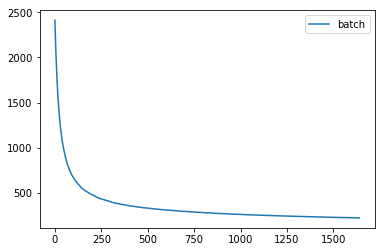

In [7]:
# 1. batch
losses_batch = []
errors_batch = []
for i in range(max_iter):
    for j in range(n_batches):
        Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
        Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
        pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)
        # print "first batch cost:", cost(pYbatch, Ybatch)

        # updates
        W2 -= lr*(derivative_w2(Z, Ybatch, pYbatch) + reg*W2)
        b2 -= lr*(derivative_b2(Ybatch, pYbatch) + reg*b2)
        W1 -= lr*(derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1)
        b1 -= lr*(derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1)
        
        pY, _ = forward(Xtest, W1, b1, W2, b2)
        l = cost(pY, Ytest_ind)
        losses_batch.append(l)

        if j % print_period == 0:
            print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, l))

            e = error_rate(pY, Ytest)
            errors_batch.append(e)
            print("Error rate:", e)

pY, _ = forward(Xtest, W1, b1, W2, b2)
print("Final error rate:", error_rate(pY, Ytest))

plt.plot(losses_batch, label="batch")
plt.legend()
plt.show()

Cost at iteration i=0, j=0: 2412.879788
Error rate: 0.866
Cost at iteration i=1, j=0: 295.820512
Error rate: 0.096
Cost at iteration i=2, j=0: 236.473903
Error rate: 0.08
Cost at iteration i=3, j=0: 201.213974
Error rate: 0.065
Cost at iteration i=4, j=0: 184.760397
Error rate: 0.061
Cost at iteration i=5, j=0: 172.598190
Error rate: 0.057
Cost at iteration i=6, j=0: 164.934774
Error rate: 0.053
Cost at iteration i=7, j=0: 160.132204
Error rate: 0.053
Cost at iteration i=8, j=0: 154.264560
Error rate: 0.053
Cost at iteration i=9, j=0: 150.778508
Error rate: 0.049
Cost at iteration i=10, j=0: 147.981665
Error rate: 0.049
Cost at iteration i=11, j=0: 145.828757
Error rate: 0.049
Cost at iteration i=12, j=0: 144.235080
Error rate: 0.049
Cost at iteration i=13, j=0: 142.733264
Error rate: 0.048
Cost at iteration i=14, j=0: 141.551243
Error rate: 0.048
Cost at iteration i=15, j=0: 140.678280
Error rate: 0.048
Cost at iteration i=16, j=0: 140.036858
Error rate: 0.048
Cost at iteration i=17, 

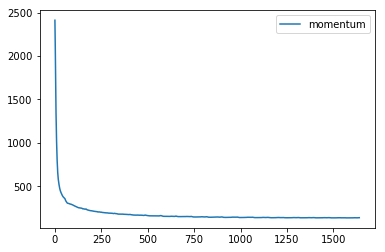

In [8]:
# 2. batch with momentum
W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()
losses_momentum = []
errors_momentum = []
mu = 0.9
dW2 = 0
db2 = 0
dW1 = 0
db1 = 0
for i in range(max_iter):
    for j in range(n_batches):
        Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
        Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
        pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)

        # gradients
        gW2 = derivative_w2(Z, Ybatch, pYbatch) + reg*W2
        gb2 = derivative_b2(Ybatch, pYbatch) + reg*b2
        gW1 = derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1
        gb1 = derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1

        # update velocities
        dW2 = mu*dW2 - lr*gW2
        db2 = mu*db2 - lr*gb2
        dW1 = mu*dW1 - lr*gW1
        db1 = mu*db1 - lr*gb1

        # updates
        W2 += dW2
        b2 += db2
        W1 += dW1
        b1 += db1

        pY, _ = forward(Xtest, W1, b1, W2, b2)
        l = cost(pY, Ytest_ind)
        losses_momentum.append(l)
        if j % print_period == 0:
            
            print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, l))

            e = error_rate(pY, Ytest)
            errors_momentum.append(e)
            print("Error rate:", e)
pY, _ = forward(Xtest, W1, b1, W2, b2)
print("Final error rate:", error_rate(pY, Ytest))

plt.plot(losses_momentum, label="momentum")
plt.legend()
plt.show()

Cost at iteration i=0, j=0: 2345.861562
Error rate: 0.837
Cost at iteration i=1, j=0: 291.979780
Error rate: 0.095
Cost at iteration i=2, j=0: 233.285527
Error rate: 0.078
Cost at iteration i=3, j=0: 199.558750
Error rate: 0.064
Cost at iteration i=4, j=0: 183.080692
Error rate: 0.059
Cost at iteration i=5, j=0: 170.953412
Error rate: 0.056
Cost at iteration i=6, j=0: 163.064968
Error rate: 0.054
Cost at iteration i=7, j=0: 157.492518
Error rate: 0.05
Cost at iteration i=8, j=0: 153.776842
Error rate: 0.051
Cost at iteration i=9, j=0: 151.486067
Error rate: 0.05
Cost at iteration i=10, j=0: 147.547248
Error rate: 0.049
Cost at iteration i=11, j=0: 144.959410
Error rate: 0.05
Cost at iteration i=12, j=0: 143.290142
Error rate: 0.05
Cost at iteration i=13, j=0: 141.824733
Error rate: 0.048
Cost at iteration i=14, j=0: 140.678113
Error rate: 0.048
Cost at iteration i=15, j=0: 139.857560
Error rate: 0.049
Cost at iteration i=16, j=0: 139.078356
Error rate: 0.047
Cost at iteration i=17, j=0

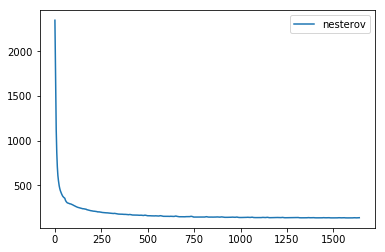

In [9]:
# 3. batch with Nesterov momentum
W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

losses_nesterov = []
errors_nesterov = []

mu = 0.9
vW2 = 0
vb2 = 0
vW1 = 0
vb1 = 0
for i in range(max_iter):
    for j in range(n_batches):
        Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
        Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
        pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)

        # updates
        gW2 = derivative_w2(Z, Ybatch, pYbatch) + reg*W2
        gb2 = derivative_b2(Ybatch, pYbatch) + reg*b2
        gW1 = derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1
        gb1 = derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1

        # v update
        vW2 = mu*vW2 - lr*gW2
        vb2 = mu*vb2 - lr*gb2
        vW1 = mu*vW1 - lr*gW1
        vb1 = mu*vb1 - lr*gb1

        # param update
        W2 += mu*vW2 - lr*gW2
        b2 += mu*vb2 - lr*gb2
        W1 += mu*vW1 - lr*gW1
        b1 += mu*vb1 - lr*gb1
        
        pY, _ = forward(Xtest, W1, b1, W2, b2)
        l = cost(pY, Ytest_ind)
        losses_nesterov.append(l)

        if j % print_period == 0:
            
            print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, l))

            e = error_rate(pY, Ytest)
            errors_nesterov.append(e)
            print("Error rate:", e)
pY, _ = forward(Xtest, W1, b1, W2, b2)
print("Final error rate:", error_rate(pY, Ytest))

plt.plot(losses_nesterov, label="nesterov")
plt.legend()
plt.show()

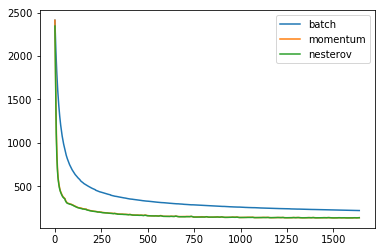

In [10]:
plt.plot(losses_batch, label="batch")
plt.plot(losses_momentum, label="momentum")
plt.plot(losses_nesterov, label="nesterov")
plt.legend()
plt.show()